In [23]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

In [24]:
# read data
csvPath = 'BTCUSD_M15.csv'
df = pd.read_csv(csvPath)
df.head()

,Unnamed: 0.1,Unnamed: 0,Time,Open,High,Low,Close,Volume,size,close_real,status
0,0,1,2017-05-22 23:15:00,2131,2153,2123,2135,17,29.5,2135.0,1.0
1,1,2,2017-05-22 23:30:00,2132,2136,2116,2142,22,19.6,2142.0,1.0
2,2,3,2017-05-22 23:45:00,2142,2154,2112,2162,24,41.4,2162.0,1.0
3,3,4,2017-05-23 00:00:00,2142,2169,2117,2175,16,52.1,2175.0,1.0
4,4,5,2017-05-23 00:15:00,2162,2181,2146,2153,16,34.4,2153.0,-1.0


In [25]:
# Preprossing data

# convert to number
df = df.astype({'Open': int, 'High': int, 'Low': int, 'Close': int, 'Volume': int})

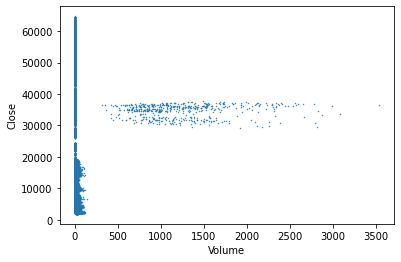

In [26]:
# plot data
volume = np.asanyarray(df[['Volume']])
close = np.asanyarray(df[['Close']])

plt.scatter(volume, close, s=0.2)
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()

In [27]:
# Simple Linear regression
dfTrain = df.sample(frac=0.8, random_state=4)
dfTest = df.drop(dfTrain.index)

volumeTrain = np.asanyarray(dfTrain[['Volume']])
closeTrain = np.asanyarray(dfTrain[['Close']])
volumeTest = np.asanyarray(dfTest[['Volume']])
closeTest = np.asanyarray(dfTest[['Close']])

reg = LinearRegression()
reg.fit(volumeTrain, closeTrain)
closePredict = reg.predict(volumeTest)

percent = r2_score(closeTest, closePredict)
print("Predict: {}%".format(percent))

Predict: 0.006807821725446472%


In [28]:
## add size of candle
# df['size'] = df['High'] - df['Low']
# df['size'] = df['size'].apply(pd.to_numeric, errors='coerce')

## save changes
#df.to_csv(csvPath)
#df.head()

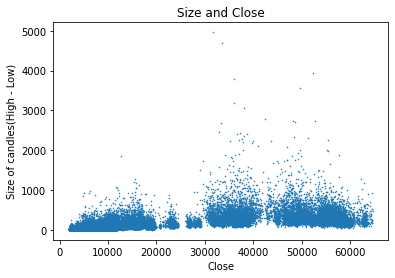

Predict: 0.4766755296686117%


In [29]:
# plot with size
x = np.asanyarray(df[['Close']])
y = np.asanyarray(df[['size']])
plt.title('Size and Close')
plt.scatter(x, y, s=0.3)
plt.xlabel('Close')
plt.ylabel('Size of candles(High - Low)')
plt.show()

# predict with size of candles
sizeTrain = np.asanyarray(dfTrain[['size']])
sizeTest = np.asanyarray(dfTest[['size']])

reg.fit(sizeTrain, closeTrain)
closePredict = reg.predict(sizeTest)
percent = r2_score(closeTest, closePredict)
print('Predict: {}%'.format(percent))

In [30]:
# shift Close to up
# df['close_real'] = df['Close']
# df['Close'] = df['Close'].shift(-1)
df.tail()
print('Shifted')


# delete last and first row
# df = df[1:-1]
df.head()
df.to_csv(csvPath)

Shifted


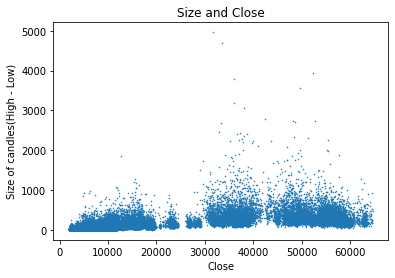

Predict: 0.4766755296686117%


In [31]:
# predict after shift close
# plot with size
x = np.asanyarray(df[['Close']])
y = np.asanyarray(df[['size']])
plt.title('Size and Close')
plt.scatter(x, y, s=0.3)
plt.xlabel('Close')
plt.ylabel('Size of candles(High - Low)')
plt.show()

# predict with size of candles
sizeTrain = np.asanyarray(dfTrain[['size']])
sizeTest = np.asanyarray(dfTest[['size']])

reg.fit(sizeTrain, closeTrain)
closePredict = reg.predict(sizeTest)
percent = r2_score(closeTest, closePredict)
print('Predict: {}%'.format(percent))

In [32]:
# compare columns
conditions = [(df['Close'] > df['Open']), (df['Close'] < df['Open']), (df['Close'] == df['Open'])]
choices = [1, -1, 0] # up, down, zero
df['status'] = np.select(condlist=conditions, choicelist=choices, default=np.nan)
df.to_csv(csvPath)

In [33]:
df

,Unnamed: 0.1,Unnamed: 0,Time,Open,High,Low,Close,Volume,size,close_real,status
0,0,1,2017-05-22 23:15:00,2131,2153,2123,2135,17,29.5,2135.0,1.0
1,1,2,2017-05-22 23:30:00,2132,2136,2116,2142,22,19.6,2142.0,1.0
2,2,3,2017-05-22 23:45:00,2142,2154,2112,2162,24,41.4,2162.0,1.0
3,3,4,2017-05-23 00:00:00,2142,2169,2117,2175,16,52.1,2175.0,1.0
4,4,5,2017-05-23 00:15:00,2162,2181,2146,2153,16,34.4,2153.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
99988,99988,99989,2021-06-09 19:15:00,36228,36282,36109,36419,1,173.3,36419.0,1.0
99989,99989,99990,2021-06-09 19:30:00,36218,36469,36202,36362,1,266.8,36362.0,1.0
99990,99990,99991,2021-06-09 19:45:00,36419,36424,36336,36521,1,87.4,36521.0,1.0
99991,99991,99992,2021-06-09 20:00:00,36362,36540,36349,36222,1,191.4,36222.0,-1.0
